In [111]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
snowball = SnowballStemmer('english')
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from collections import Counter
import string
from nltk.tag import pos_tag
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import auc
from sklearn.cross_validation import KFold
from sklearn.model_selection import cross_val_score
import cPickle as pickle
%matplotlib inline

In [2]:
def clean_csv(filename):
    new_df = pd.read_csv(filename)
    clean_df = new_df.rename(index=str, columns={"0": "title", "1": "link", '2': 'content'})
    clean_df = clean_df.drop_duplicates(subset='content')
    clean_df = clean_df.dropna(how='any')
    clean_df = clean_df.drop('Unnamed: 0', axis=1)
    return clean_df

In [3]:
false = clean_csv('data/false_corpus.csv')
true = clean_csv('data/corpus.csv')

In [4]:
true.describe()

,title,link,content
count,2239,2239,2239
unique,2202,2202,2239
top,Best Foods to Eat While Pregnant,http://www.foodandnutrition.org/Stone-Soup/Apr...,Great basic info on breastfeeding and tongue-t...
freq,3,4,1


In [5]:
false['label'] = 0

In [6]:
true['label'] = 1

In [7]:
content = [false, true]

In [8]:
all_content = pd.concat(content)

In [ ]:
stem = 

In [9]:
def find_exclamations(title):
    title = str(title).strip()
    return sum([1 for letter in title if letter == '!'])/float(len(title))

def unique_word_pct(string):
    unique_words = set()
    for word in string.split():
        unique_words.add(word)
    return float(len(unique_words))/float(len(string.split()))

def word_counter(content):
    words = Counter()
    for word in content.split():
        words[word] += 1
    return words

def pos_tag_finder(content):
    content_clean = str(content).decode('utf-8').encode('ascii','ignore').replace('\n', '')
    tokens = word_tokenize(content_clean)
    tags = pos_tag(tokens)
    counts = Counter(tag for word,tag in tags)
    total = sum(counts.values())
    return dict((word, float(count)/total) for word,count in counts.items())

def find_sources(content):
    short_content = content[-(len(content)/4):].lower()
    replace_punctuation = string.maketrans(string.punctuation, ' '*len(string.punctuation))
    content_clean = short_content.translate(replace_punctuation)
    word_dict = word_counter(content_clean)
    word_set = set([key for key in word_dict])
    source_words = set(['source', 'sources', 'citation', 'citations', 'reference', 'references'])
    return int(any(word in word_set for word in source_words))

def stem(content, stemmer ='snowball' ):
    content_clean = content.decode('utf-8', errors='ignore').encode('ascii',errors='ignore').replace('\n', ' ')   
    if stemmer=='snowball':
        stemmed = [snowball.stem(word) for word in content_clean.split(' ')]
    return ' '.join(stemmed)

def find_credentials(content):
    word_dict = word_counter(content)
    word_set = set([key for key in word_dict])
    source_words = set(['MD', 'PhD', 'MPH', "RD", "M.D.", "R.D.", "M.P.H.", 'Ph.D.', 'DPhil'])
    return int(any(word in word_set for word in source_words))

def word_length(content):
    words = content.split()
    return sum([len(word) for word in words])/float(len(words))

def title_capitals(title):
    title = str(title).strip()
    return sum([1 for letter in title if letter.isupper()])/float(len(title))


In [149]:
# for app.py

def clean():
    user_data = request.json
    input_title = str(user_data['title'])
    input_text = str(user_data['article'])
    input_article = pd.DataFrame(columns=['title', 'article'])
    input_article = input_article.append({'title': input_title, 'article': input_article}, ignore_index=True)
    input_article = helper_functions.add_columns()
    return

In [258]:
def add_columns(df):
    dataframe = df
    dataframe['credentials'] = dataframe['article'].apply(find_credentials)
    dataframe['unique_words'] = dataframe['article'].apply(unique_word_pct)
    dataframe['content_length'] = dataframe['article'].apply(len)
    dataframe['sources'] = dataframe['article'].apply(find_sources)
    dataframe['avg_word_length'] = dataframe['article'].apply(word_length)
    dataframe['uppercase_title'] = dataframe['title'].apply(title_capitals)
    dataframe['exclamations_title'] = dataframe['title'].apply(find_exclamations)
    dataframe['exclamations_content'] = dataframe['article'].apply(find_exclamations)
    dataframe['stemmed_content'] = dataframe['article'].apply(stem)
    pos_dict = pos_tag_finder(dataframe['article'][0])
    for key, value in pos_dict.iteritems():
        pos_content = dataframe.set_value(0, col=key, value=value)
    pos_content = pos_content.fillna(0)
    return pos_content
#     
#     pos_content = dataframe.update(pos_dict, index=[0])
#     pos_content = pos_content.drop(['index_dataframe', 'index_PoS_df'], axis=1)

#     return pos_content

In [152]:
test_title = "Meal Planning for Pregnant Women With Diabetes"
test_text = """Meal Planning for Pregnant Women With Diabetes Your meal plan for diabetes needs to be modified when you are pregnant. The total calories you need are based on your prepregnancy weight, age, activity level, and whether you are carrying more than one baby.

Dieting to lose weight during pregnancy is not recommended, because you may not receive enough nourishment for you and your baby, and it may increase your risk for premature delivery.

Follow these guidelines for your meal plan during pregnancy.

Carbohydrate

Inadequate carbohydrate intake can result in low blood sugar (hypoglycemia) for women taking insulin and in ketone production for women who have gestational diabetes. Excessive carbohydrate intake can result in elevated blood sugar levels.

Make sure your meal plan contains:

Complex carbohydrate, especially foods high in fiber, such as oatmeal, brown rice, bran cereal, whole wheat bread, whole wheat pasta, and beans.
Fresh fruits.
Milk.
Fresh or frozen vegetables.
Limit these carbohydrate foods in your diet:

Refined sugar and foods with a high content of refined sugars (sweets)
Refined starches, such as highly processed breakfast cereals, instant potatoes, instant rice, or instant noodles
Fruit juice
Protein

If your kidney function is impaired, your protein allowance may be lowered.

Fat

Monounsaturated fats and omega-3 fats, rather than saturated fats, should continue to be the primary source of fat in your diet.

Fiber

Get enough fiber each day. Fiber can help stabilize your blood sugar levels and relieve constipation, which is common during pregnancy.

CONTINUE READING BELOW
related content WebMD SUGGESTS
SLIDESHOW

Best and Worst Meals for Diabetes-Savvy Dining
Start
Most people get far more sodium than they need. Talk to your doctor about how much sodium you should eat.

Vitamins and minerals

Take a prenatal vitamin with folic acid and iron to meet your body's increased need for these micronutrients. Folic acid is needed for the production of blood cells. And iron is needed for red blood cells to deliver oxygen throughout the body. Folic acid has also been proved to reduce the risk of fetal neural tube defects.

You may need to take a vitamin B12 supplement, which is important for the production of red blood cells, and a vitamin D supplement if you are a strict vegetarian (vegan). Vitamin B12 can only be obtained from animal sources in the diet.

Other vitamins and minerals, such as the B vitamins and calcium, are important during pregnancy for producing energy and preserving your body's calcium stores.

Very large doses (megadoses) of vitamins, especially vitamins A and D, are not recommended during pregnancy. Vitamins and minerals should only be taken under your doctor's supervision.

Artificial sweeteners

Saccharin (Sweet'N Low, Sugar Twin), aspartame (Equal, NutraSweet), acesulfame K (Sunett), sucralose (Splenda), and neotame are safe to eat when you are pregnant.

Avoid using aspartame (Equal or Nutrasweet) if you have phenylketonuria (PKU).

Caffeine

Avoid caffeine.

Alcohol

Do not drink alcohol. No amount of alcohol has been proved to be safe for a developing baby (fetus).

Herbs

Some herbs may cause premature labor and others may cause high or low blood sugar levels. Talk with your doctor if you are taking any herbs.

Credits

ByHealthwise Staff
Primary Medical ReviewerAdam Husney, MD - Family Medicine

Current as ofNovember 20, 2015"""

In [259]:
test_article = pd.DataFrame(columns=['title', 'article', 'PRP$', 'VBG', 'VBD', 'VBN', 'VBP', 'WDT', 'JJ', 'WP', 'VBZ', 'DT',
            '#', 'RP', '$', 'NN', ')', '(', ',', '.', 'TO', 'PRP', 'RB', ':',
            'NNS', 'NNP', 'VB', 'WRB', 'CC', 'PDT', 'RBS', 'RBR', 'CD', 'EX',
            'IN', 'WP$', 'MD', 'NNPS', 'JJS', 'JJR', 'UH', 'FW', 'LS', 'POS', 'SYM', '``', "''"])
test_article = input_article.append({'title': test_title, 'article': test_text}, ignore_index=True)

In [257]:
test_article.columns

Index([u'title', u'article', u'PRP$', u'VBG', u'VBD', u'VBN', u'VBP', u'WDT',
       u'JJ', u'WP', u'VBZ', u'DT', u'#', u'RP', u'$', u'NN', u')', u'(', u',',
       u'.', u'TO', u'PRP', u'RB', u':', u'NNS', u'NNP', u'VB', u'WRB', u'CC',
       u'PDT', u'RBS', u'RBR', u'CD', u'EX', u'IN', u'WP$', u'MD', u'NNPS',
       u'JJS', u'JJR', u'UH', u'FW', u'LS', u'POS', u'SYM', u'``', u'''',
       u'credentials', u'unique_words', u'content_length', u'sources',
       u'avg_word_length', u'uppercase_title', u'exclamations_title',
       u'exclamations_content', u'stemmed_content'],
      dtype='object')

In [260]:
test_df = add_columns(test_article)

In [261]:
test_df.columns

Index([u'title', u'article', u'PRP$', u'VBG', u'VBD', u'VBN', u'VBP', u'WDT',
       u'JJ', u'WP', u'VBZ', u'DT', u'#', u'RP', u'$', u'NN', u')', u'(', u',',
       u'.', u'TO', u'PRP', u'RB', u':', u'NNS', u'NNP', u'VB', u'WRB', u'CC',
       u'PDT', u'RBS', u'RBR', u'CD', u'EX', u'IN', u'WP$', u'MD', u'NNPS',
       u'JJS', u'JJR', u'UH', u'FW', u'LS', u'POS', u'SYM', u'``', u'''',
       u'credentials', u'unique_words', u'content_length', u'sources',
       u'avg_word_length', u'uppercase_title', u'exclamations_title',
       u'exclamations_content', u'stemmed_content'],
      dtype='object')

In [262]:
gbc_test = test_df.drop(['title','article','stemmed_content'], axis=1)

In [263]:
len(gbc_test.columns)

53

In [270]:
proba = GBC.predict_proba(gbc_test.iloc[0,:])
proba[0][1]

//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


0.46423823461769459

In [236]:
gbc_test.columns

Index([u'PRP$', u'VBG', u'VBD', u'VBN', u'VBP', u'WDT', u'JJ', u'WP', u'VBZ',
       u'DT', u'#', u'RP', u'$', u'NN', u')', u'(', u',', u'.', u'TO', u'PRP',
       u'RB', u':', u'NNS', u'NNP', u'VB', u'WRB', u'CC', u'PDT', u'RBS',
       u'RBR', u'CD', u'EX', u'IN', u'WP$', u'MD', u'NNPS', u'JJS', u'JJR',
       u'UH', u'FW', u'LS', u'POS', u'credentials', u'unique_words',
       u'content_length', u'sources', u'avg_word_length', u'uppercase_title',
       u'exclamations_title', u'exclamations_content'],
      dtype='object')

In [241]:
for i in X_train.columns: 
    if i not in gbc_test.columns:
        print i

''
SYM
``


In [242]:
X_train.columns

Index([u'credentials', u'unique_words', u'content_length', u'sources',
       u'avg_word_length', u'uppercase_title', u'exclamations_title',
       u'exclamations_content', u'#', u'$', u'''', u'(', u')', u',', u'.',
       u':', u'CC', u'CD', u'DT', u'EX', u'FW', u'IN', u'JJ', u'JJR', u'JJS',
       u'LS', u'MD', u'NN', u'NNP', u'NNPS', u'NNS', u'PDT', u'POS', u'PRP',
       u'PRP$', u'RB', u'RBR', u'RBS', u'RP', u'SYM', u'TO', u'UH', u'VB',
       u'VBD', u'VBG', u'VBN', u'VBP', u'VBZ', u'WDT', u'WP', u'WP$', u'WRB',
       u'``'],
      dtype='object')

In [243]:
POS_list = ['PRP$', 'VBG', 'VBD', 'VBN', 'VBP', 'WDT', 'JJ', 'WP', 'VBZ', 'DT',
            '#', 'RP', '$', 'NN', ')', '(', ',', '.', 'TO', 'PRP', 'RB', ':',
            'NNS', 'NNP', 'VB', 'WRB', 'CC', 'PDT', 'RBS', 'RBR', 'CD', 'EX',
            'IN', 'WP$', 'MD', 'NNPS', 'JJS', 'JJR', 'UH', 'FW', 'LS', 'POS', 'SYM', '``', "''"]

In [19]:
PoS_tag_list = []
for row in all_content['content']:
    PoS_tag_list.append(pos_tag_finder(row))


In [20]:
PoS_df = pd.DataFrame(PoS_tag_list)
PoS_df = PoS_df.reset_index()
PoS_df.index

RangeIndex(start=0, stop=2916, step=1)

In [ ]:
def naive_predict_proba(content):
    

In [27]:
all_content['credentials'] = all_content['content'].apply(find_credentials)

all_content['unique_words'] = all_content['content'].apply(unique_word_pct)

all_content['content_length'] = all_content['content'].apply(len)

all_content['sources'] = all_content['content'].apply(find_sources)

all_content['avg_word_length'] = all_content['content'].apply(word_length)

all_content['uppercase_title'] = all_content['title'].apply(title_capitals)

all_content['exclamations_title'] = all_content['title'].apply(find_exclamations)

all_content['exclamations_content'] = all_content['content'].apply(find_exclamations)

all_content['stemmed_content'] = all_content['content'].apply(stem)

In [28]:
all_content = all_content.reset_index()

In [29]:
all_content.index

RangeIndex(start=0, stop=2916, step=1)

In [30]:
pos_content = all_content.join(PoS_df, lsuffix='_all_content', rsuffix='_PoS_df')

In [31]:
pos_content.columns

Index([u'index_all_content', u'title', u'link', u'content', u'label',
       u'credentials', u'unique_words', u'content_length', u'sources',
       u'avg_word_length', u'uppercase_title', u'exclamations_title',
       u'exclamations_content', u'stemmed_content', u'index_PoS_df', u'#',
       u'$', u'''', u'(', u')', u',', u'.', u':', u'CC', u'CD', u'DT', u'EX',
       u'FW', u'IN', u'JJ', u'JJR', u'JJS', u'LS', u'MD', u'NN', u'NNP',
       u'NNPS', u'NNS', u'PDT', u'POS', u'PRP', u'PRP$', u'RB', u'RBR', u'RBS',
       u'RP', u'SYM', u'TO', u'UH', u'VB', u'VBD', u'VBG', u'VBN', u'VBP',
       u'VBZ', u'WDT', u'WP', u'WP$', u'WRB', u'``'],
      dtype='object')

In [32]:
pos_content = pos_content.drop('index_all_content', axis=1)

In [34]:
pos_content = pos_content.drop('index_PoS_df', axis=1)

In [35]:
pos_content = pos_content.fillna(0)

In [36]:
pos_content.head()

,title,link,content,label,credentials,unique_words,content_length,sources,avg_word_length,uppercase_title,...,VBD,VBG,VBN,VBP,VBZ,WDT,WP,WP$,WRB,``
0,\nINSANITY Results: Danielle Burned Off Belly ...,https://www.teambeachbody.com/teambeachbodyblo...,"Danielle Marino, age 43, lost 39 lbs. in 6 mon...",0,0,0.502135,6594,0,4.631939,0.250000,...,0.045588,0.028676,0.016176,0.027206,0.012500,0.000735,0.004412,0.000000,0.013235,0.0
1,\nDoes Breastfeeding Really Help You Lose Weig...,https://www.teambeachbody.com/teambeachbodyblo...,There are a lot of assumptions made about brea...,0,0,0.425944,12684,0,5.136012,0.138889,...,0.013437,0.019072,0.015605,0.031209,0.035111,0.008236,0.007369,0.000433,0.006068,0.0
2,\nBeachbody Results: Janine Lost 62.4 Pounds a...,https://www.teambeachbody.com/teambeachbodyblo...,"Janine Figueroa, age 30, lost 62.4 lbs with 21...",0,0,0.472928,5057,0,4.588950,0.103448,...,0.048756,0.021891,0.017910,0.038806,0.015920,0.000000,0.002985,0.000000,0.011940,0.0
3,\n21 Day Fix Results: Busy Mom Lost 124 Pounds...,https://www.teambeachbody.com/teambeachbodyblo...,"Rachelle Hosick, age 29, lost 124 lbs with 21 ...",0,0,0.439044,6502,0,4.356672,0.140351,...,0.045455,0.026393,0.011730,0.042522,0.018328,0.001466,0.006598,0.000000,0.009531,0.0
4,\nBeachbody Results: Amanda Lost 71.6 Pounds a...,https://www.teambeachbody.com/teambeachbodyblo...,"Amanda Reece, age 35, lost 71.6 lbs. with a va...",0,0,0.441981,7394,0,4.465632,0.103448,...,0.066970,0.025358,0.016255,0.026008,0.011053,0.002601,0.005852,0.000000,0.007152,0.0


## functions to add columns to the test text inputed by user

In [ ]:
def add_columns():
    

In [37]:
labels = pos_content.pop('label')

In [38]:

stop = set(stopwords.words('english'))
html_stopwords = ["span", 'vm', 'hook', 'class', 'strong', 'href', 'style', 'rgb', 
                  'transpar', '153', 'br', 'strong', 'span', 'com', 'vm', 'img', 'http', 'zzzzzzzzzzzz']
stop.update(html_stopwords)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(pos_content, labels, test_size=0.33, random_state=99)

In [40]:
X_train.columns

Index([u'title', u'link', u'content', u'credentials', u'unique_words',
       u'content_length', u'sources', u'avg_word_length', u'uppercase_title',
       u'exclamations_title', u'exclamations_content', u'stemmed_content',
       u'#', u'$', u'''', u'(', u')', u',', u'.', u':', u'CC', u'CD', u'DT',
       u'EX', u'FW', u'IN', u'JJ', u'JJR', u'JJS', u'LS', u'MD', u'NN', u'NNP',
       u'NNPS', u'NNS', u'PDT', u'POS', u'PRP', u'PRP$', u'RB', u'RBR', u'RBS',
       u'RP', u'SYM', u'TO', u'UH', u'VB', u'VBD', u'VBG', u'VBN', u'VBP',
       u'VBZ', u'WDT', u'WP', u'WP$', u'WRB', u'``'],
      dtype='object')

In [41]:
vector = TfidfVectorizer(stop_words=stop)

In [42]:
train_matrix = vector.fit_transform(X_train['stemmed_content'])

In [43]:
bayes_model = MultinomialNB()

In [44]:
bayes_model.fit(train_matrix, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [45]:
test_matrix = vector.transform(X_test['stemmed_content'])

In [49]:
bayes_model.score(test_matrix, y_test)

0.79646936656282452

In [50]:
y_pred = bayes_model.predict(test_matrix)

In [51]:
confusion_matrix(y_pred, y_test)

array([[ 20,   1],
       [195, 747]])

In [52]:
true_neg = 0
true_pos = 0
false_pos = 0
false_neg = 0
for i,j in zip(y_pred, y_test):
    if j== 0:
        if i == j:
            true_neg+=1
        else: false_pos +=1
    if j ==1:
        if i == j:
            true_pos +=1
        else: false_neg +=1
print 'true_neg = {}, true_pos = {}, false_pos = {}, false_neg = {}'.format(true_neg, true_pos, false_pos, false_neg)

true_neg = 20, true_pos = 747, false_pos = 195, false_neg = 1


In [74]:
y_train_predictproba_nb = bayes_model.predict_proba(train_matrix)

In [75]:
y_test_predictlogprobab_nb = bayes_model.predict_proba(test_matrix)

In [56]:
X_test['predict_proba'] = X_test_predictlogprobab[:,1]

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [57]:
X_test.head()

,title,link,content,credentials,unique_words,content_length,sources,avg_word_length,uppercase_title,exclamations_title,...,VBG,VBN,VBP,VBZ,WDT,WP,WP$,WRB,``,predict_proba
576,"Letters, Fall 2016",https://www.westonaprice.org/get-involved/lett...,ON THE WISE TRADITIONS JOURNEY IN KENYA I know...,1,0.468455,15994,0,4.799492,0.111111,0.000000,...,0.016160,0.012928,0.020039,0.019392,0.003232,0.003555,0.0,0.004525,0.0,-0.020841
778,Attachment Parenting Links,http://kellymom.com/blog-post/aplinks/,ArticlesParenting: Day & Night (this website)W...,1,0.671910,3305,0,6.426966,0.115385,0.000000,...,0.025243,0.007767,0.011650,0.027184,0.003883,0.011650,0.0,0.000000,0.0,-0.001559
1177,Bronchitis (ages 5 to 8),https://www.babycenter.com/0_bronchitis-ages-5...,What is bronchitis?Bronchitis is an infection ...,0,0.552301,4446,1,5.192469,0.041667,0.000000,...,0.018935,0.015385,0.020118,0.028402,0.004734,0.005917,0.0,0.003550,0.0,-0.000743
2866,\n\n\n\n Rheumatoid arthritis: Can d...,http://www.mayoclinic.org/diseases-conditions/...,Pueden determinadas dietas influir en los snto...,1,0.584127,4697,0,6.422222,0.035928,0.000000,...,0.004032,0.001344,0.013441,0.017473,0.000000,0.000000,0.0,0.002688,0.0,-0.000077
160,\nTransformation Tuesday: Kenny Lost 45 Pounds...,https://www.teambeachbody.com/teambeachbodyblo...,Kenny never thought that he could get in great...,0,0.561404,2787,0,4.434698,0.142857,0.017857,...,0.015598,0.029463,0.025997,0.010399,0.003466,0.000000,0.0,0.005199,0.0,-0.147409


# Testing Different Models and ROC Curve

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [234]:
X_train.columns

Index([u'credentials', u'unique_words', u'content_length', u'sources',
       u'avg_word_length', u'uppercase_title', u'exclamations_title',
       u'exclamations_content', u'#', u'$', u'''', u'(', u')', u',', u'.',
       u':', u'CC', u'CD', u'DT', u'EX', u'FW', u'IN', u'JJ', u'JJR', u'JJS',
       u'LS', u'MD', u'NN', u'NNP', u'NNPS', u'NNS', u'PDT', u'POS', u'PRP',
       u'PRP$', u'RB', u'RBR', u'RBS', u'RP', u'SYM', u'TO', u'UH', u'VB',
       u'VBD', u'VBG', u'VBN', u'VBP', u'VBZ', u'WDT', u'WP', u'WP$', u'WRB',
       u'``'],
      dtype='object')

In [60]:
X_train = X_train.drop(['title','link','content', 'stemmed_content'], axis=1)
X_test = X_test.drop(['title','link','content', 'stemmed_content', 'predict_proba'], axis=1)

In [63]:
X_train = X_train.apply(pd.to_numeric)
X_test = X_test.apply(pd.to_numeric)

In [64]:
##Fitting each model

rf_train = RandomForestClassifier().fit(X_train, y_train)

GBC = GradientBoostingClassifier().fit(X_train, y_train)
linreg_train = LinearRegression().fit(X_train, y_train)

logisticmodel = LogisticRegression().fit(X_train, y_train)

In [78]:
##Predicting classification probability for each model 
y_predictprob_df = rf_train.predict_proba(X_test)
y_predictprob_lr = logisticmodel.predict_proba(X_test)
y_predictlinreg = linreg_train.predict(X_test)
y_predictgbc = GBC.predict_proba(X_test)
y_pred_ensemble = (y_test_predictlogprobab_nb[:,1] + y_predictgbc[:,1])/2.0

# Y_pred_avg = 

##fitting the roc curve and plotting 
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predictprob_lr[:,1])
false_positive_rate_rf, true_positive_rate_rf, thresholds_rf = roc_curve(y_test, y_predictprob_df[:,1])
false_positive_rate_gbc, true_positive_rate_gbc, thresholds_gbc = roc_curve(y_test, y_predictgbc[:,1])
false_positive_rate_nb, true_positive_rate_nb, thresholds_nb = roc_curve(y_test, y_test_predictlogprobab_nb[:,1])
false_positive_rate_ens, true_positive_rate_ens, thresholds_ens = roc_curve(y_test, y_pred_ensemble)

#false_positive_rate_linreg, true_positive_rate_linreg, thresholds_linreg = roc_curve(y_test, y_predictlinreg)

roc_auc_gbc = auc(false_positive_rate_gbc, true_positive_rate_gbc)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc_rf = auc(false_positive_rate_rf, true_positive_rate_rf)
roc_auc_nb = auc(false_positive_rate_nb, true_positive_rate_nb)
roc_ens = auc(false_positive_rate_ens, true_positive_rate_ens)

#roc_auc_linreg = auc(false_positive_rate_linreg, true_positive_rate_linreg)


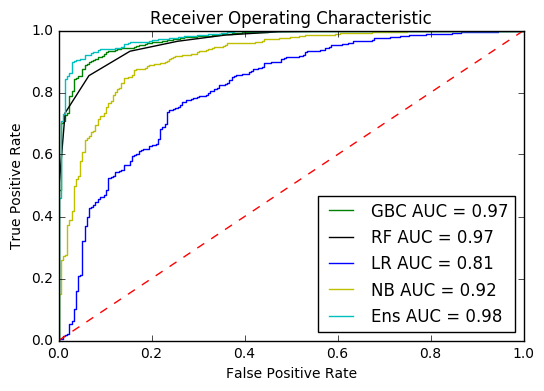

In [80]:
##Plot ROC
plt.title('Receiver Operating Characteristic')

plt.plot(false_positive_rate_gbc, true_positive_rate_gbc, 'g',
label='GBC AUC = %0.2f'% roc_auc_gbc)

plt.plot(false_positive_rate_rf, true_positive_rate_rf, 'k',
label='RF AUC = %0.2f'% roc_auc_rf)

plt.plot(false_positive_rate, true_positive_rate, 'b',
label='LR AUC = %0.2f'% roc_auc)

plt.plot(false_positive_rate_nb, true_positive_rate_nb, 'y',
label='NB AUC = %0.2f'% roc_auc_nb)

plt.plot(false_positive_rate_ens, true_positive_rate_ens, 'c',
label='Ens AUC = %0.2f'% roc_ens)



# plt.plot(false_positive_rate_nb, true_positive_rate_nb, 'r',
# label='NB AUC = %0.2f'% roc_auc_nb)

#plt.plot(false_positive_rate_linreg, true_positive_rate_linreg, 'r',
#label='AUC = %0.2f'% roc_auc_linreg)

plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
#plt.xlim([-0.1,1.2])
#plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [208]:
X_train.columns

Index([u'credentials', u'unique_words', u'content_length', u'sources',
       u'avg_word_length', u'uppercase_title', u'exclamations_title',
       u'exclamations_content', u'#', u'$', u'''', u'(', u')', u',', u'.',
       u':', u'CC', u'CD', u'DT', u'EX', u'FW', u'IN', u'JJ', u'JJR', u'JJS',
       u'LS', u'MD', u'NN', u'NNP', u'NNPS', u'NNS', u'PDT', u'POS', u'PRP',
       u'PRP$', u'RB', u'RBR', u'RBS', u'RP', u'SYM', u'TO', u'UH', u'VB',
       u'VBD', u'VBG', u'VBN', u'VBP', u'VBZ', u'WDT', u'WP', u'WP$', u'WRB',
       u'``'],
      dtype='object')

In [ ]:
log odds

In [105]:
features = zip (X_train.columns, GBC.feature_importances_)

In [112]:
# save the model to disk
filename = 'GBC_model.pkl'
pickle.dump(GBC, open(filename, 'wb'))

In [108]:
sorted_features = sorted(features, key=lambda x: x[1])

In [109]:
sorted_features

[('CC', 0.0),
 ('LS', 0.0),
 ('WP$', 0.0),
 ('PRP$', 0.00031412507398595192),
 ('``', 0.00041365952266867318),
 ('sources', 0.00065108114729933589),
 ('credentials', 0.00082621040300441876),
 ('JJR', 0.0016221908168490232),
 ('SYM', 0.0021662793110200774),
 ('RP', 0.002940455143527101),
 ('JJS', 0.0030717299253658829),
 ('UH', 0.0031894662554426546),
 ('RBS', 0.0063174557351663007),
 ('NN', 0.0064642769344254855),
 ('PRP', 0.0071417123114112333),
 ('EX', 0.0074574970091003641),
 ('PDT', 0.0075126894896501125),
 ('RB', 0.0084852293583158739),
 ('WP', 0.008530926032493313),
 ('CD', 0.0096741973846903133),
 ('NNPS', 0.010272127441609113),
 ('VBP', 0.010893629809551721),
 ('VB', 0.011717844639795673),
 ('TO', 0.012190203941787141),
 ('RBR', 0.012362145504658573),
 ('NNS', 0.013167570720991794),
 ('unique_words', 0.013770045403262496),
 ('NNP', 0.014034974865456917),
 ('VBG', 0.014328176855936927),
 ('$', 0.014995610163770679),
 (')', 0.01542538980703565),
 ('WRB', 0.017152092765663023),
 (

In [132]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble.partial_dependence import partial_dependence

In [139]:
feature_names = list(X_train.columns)
len(feature_names)

53

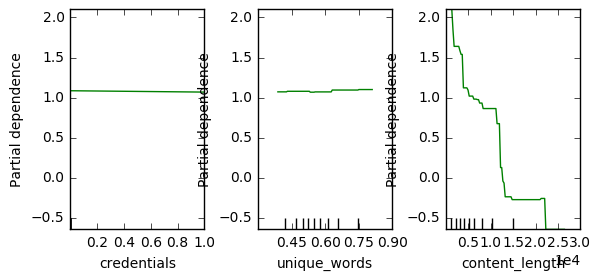

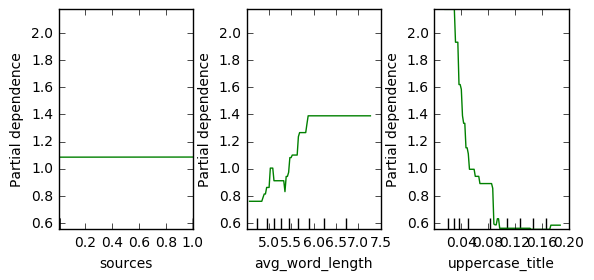

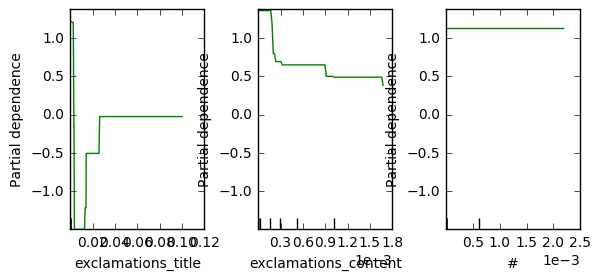

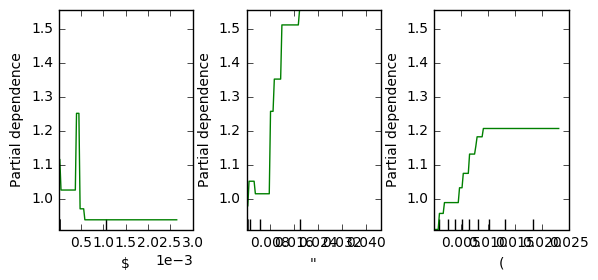

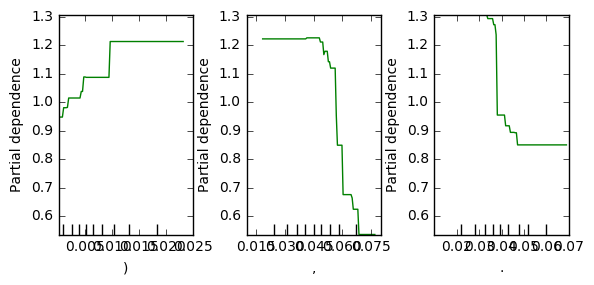

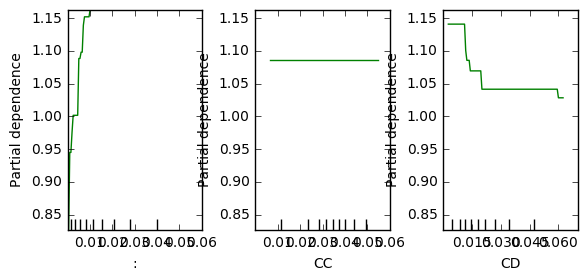

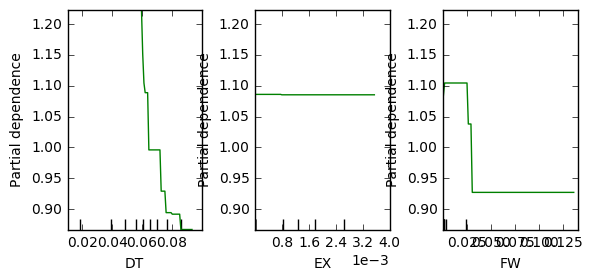

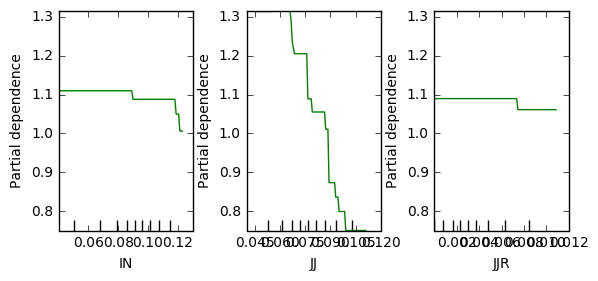

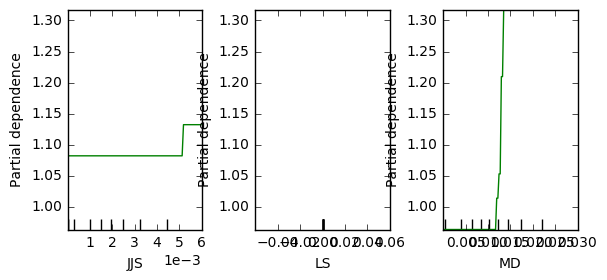

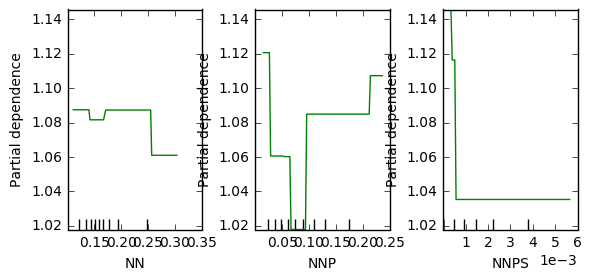

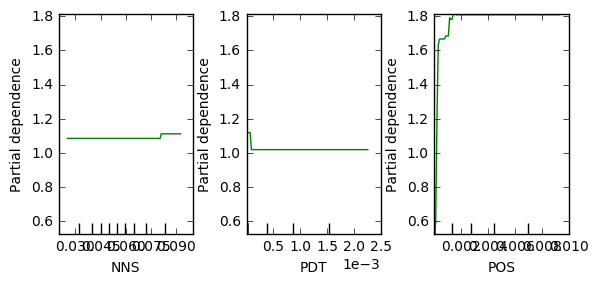

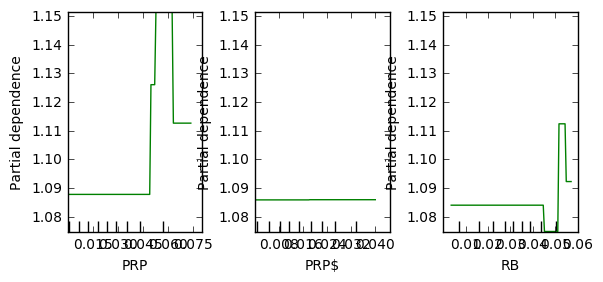

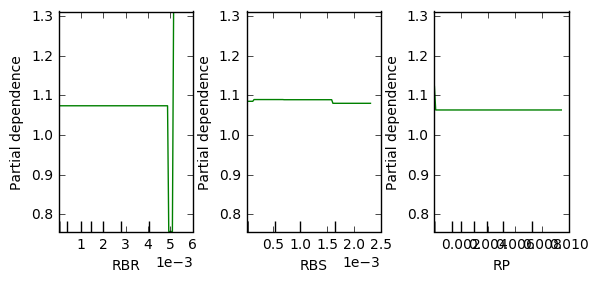

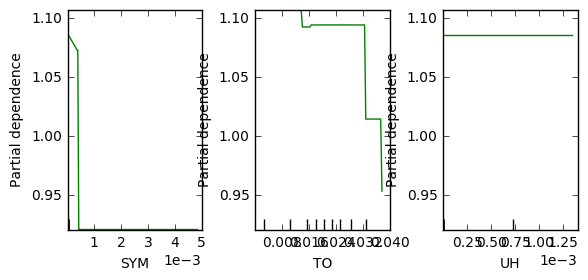

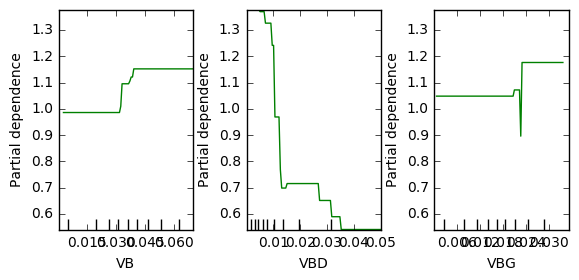

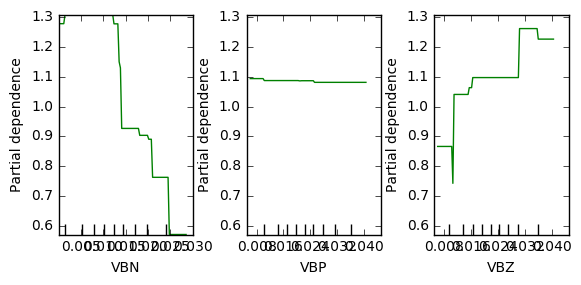

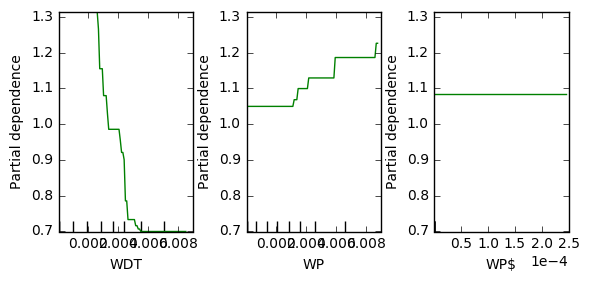

In [146]:
for i in xrange(17):
    fig, axs = plot_partial_dependence(GBC, X_train, xrange(3*i, 3*i+3), feature_names=feature_names)

In [128]:
input_article = pd.DataFrame(columns=['title', 'article'])

In [130]:
input_article = input_article.append({'title': 'test', 'article':}, ignore_index=True)

In [131]:
input_article.head()

,title,article
0,test,NaN
